Connected to MySQL Server version  8.0.28
(100000, 5000050000, 4234, 447688, datetime.datetime(2022, 3, 16, 18, 46, 17, 862604), 0)
ok
(200000, 20000100000, 4517, 825967, datetime.datetime(2022, 3, 16, 18, 46, 18, 758445), 0)
ok
(300000, 45000150000, 4258, 218076, datetime.datetime(2022, 3, 16, 18, 46, 20, 606786), 0)
ok
(400000, 80000200000, 4113, 854716, datetime.datetime(2022, 3, 16, 18, 46, 21, 582449), 0)
ok
(500000, 125000250000, 4058, 361383, datetime.datetime(2022, 3, 16, 18, 46, 23, 54167), 0)
ok
(1000, 500500, 208, 4255, datetime.datetime(2022, 3, 16, 18, 46, 23, 171788), 1)
ok
(1100, 605550, 208, 5478, datetime.datetime(2022, 3, 16, 18, 46, 23, 286335), 1)
ok
(1200, 720600, 208, 5071, datetime.datetime(2022, 3, 16, 18, 46, 23, 457440), 1)
ok
(1300, 845650, 208, 7415, datetime.datetime(2022, 3, 16, 18, 46, 23, 568046), 1)
ok
(1400, 980700, 208, 5520, datetime.datetime(2022, 3, 16, 18, 46, 23, 706112), 1)
ok
(1500, 1125750, 208, 7928, datetime.datetime(2022, 3, 16, 18, 46, 23,

Text(0, 0.5, 'Memoria')

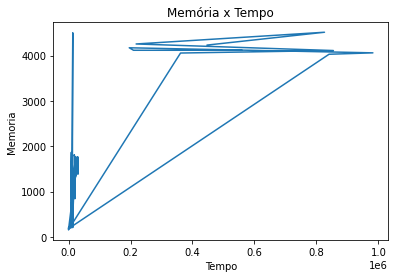

In [6]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import tracemalloc
import mysql.connector as mysql
from mysql.connector import Error
connection = None

blocks = [
    range(100_000, 600_000, 100_000),
    range(1_000, 6_000, 100),
    range(100, 600, 100),
    range(10, 60, 10),
    range(1_000_000, 6_000_000, 1_000_000)
]

def soma_tempo(n):
    tracemalloc.start()
    
    dt_inicio = datetime.now()
    end_date = 0
    accumulator = 0
    
    
    for i in range(1, n+1):
        accumulator += i
    end_date = datetime.now()
    memory = tracemalloc.get_traced_memory()[1] # segundo elemento representa o pico da memoria
    time = (end_date - dt_inicio).microseconds
    retorno = { 
        'bank_transaction': n, 
        'accumulate': accumulator,
        'memory': memory,
        'time_elapsed': time,
    }
    tracemalloc.stop()
    tracemalloc.clear_traces()
    return retorno

try:
    connection = mysql.connect(
        host = 'localhost',
        database = 'measures',
        user = 'root',
        password = 'algas123'
    )
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()

        valores = []

        # for days in range(0, 1):
        for index, block in enumerate(blocks):

            for valor in block:
                current = soma_tempo(valor)
                date = datetime.now() #- timedelta(days= days)
                query = "insert into transactions(bank_transaction, accumulate, memory, time_elapsed, exec_date, block_transaction) values (%s, %s, %s, %s, %s, %s);"
                query_data = (current['bank_transaction'], current['accumulate'], current['memory'], current['time_elapsed'], date, index)
                print(query_data)
                cursor.execute(query, query_data)
                connection.commit()
                print("ok")
                valores.append(current)

        plt.plot(
            np.array([item['time_elapsed'] for item in valores]),
            np.array([item['memory'] for item in valores]),
        )
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
    print("MySQL connection is closed")



# a)
plt.title('Memória x Tempo')
plt.xlabel('Tempo')
plt.ylabel('Memoria')
